### Importing required Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Authentication to Google Drive Files

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Access to file

In [ ]:
# link = 'https://drive.google.com/file/d/17VnKTmYjjqYQ1WtBDIhSyEhIV6Ennu0N/view?usp=share_link
id = '17VnKTmYjjqYQ1WtBDIhSyEhIV6Ennu0N'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('FlairAnalysis.csv',) 

### Load dataset

In [ ]:
df = pd.read_csv('FlairAnalysis.csv',index_col=[0])
# Dataset is now stored in a Pandas Dataframe
df

,text,Cleaned_tweets,probability,sentiment
0,RT @StrikeMapUK: The Cost of Living Crisis is ...,cost living crisis political choice yet tory t...,0.924938,NEGATIVE
1,RT @0Calamity: This is not a #CostOfLivingCris...,costoflivingcrisis stateimposedpoverty do quit...,0.865847,POSITIVE
2,RT @geoffh33: Every non-Tory MP should have st...,every non tory mp stand today call borisjohnso...,0.987879,NEGATIVE
3,RT @hewitson10: Ian Blackford owned the show a...,ian blackford own show always tory care costof...,0.544504,NEGATIVE
4,RT @snowy2007: Serious question for Scottish P...,serious question scottish power say energy gre...,0.600847,POSITIVE
...,...,...,...,...
541723,RT @SB_Sarah10: Do you honestly think #LizTrus...,honestly think liztruss plan cost living crisis,0.993839,NEGATIVE
541724,"RT @michaelbartrum: Every hour, 10 people die ...",every hour people die poverty uk rise costofli...,0.996808,NEGATIVE
541725,Jesus! £170 billion excess profits over 2 yrs!...,jesus billion excess profit yrs time take stre...,0.689607,NEGATIVE
541726,RT @maxwellwoodger: Attended the Final @Conser...,attend final leadership debate uk husting fell...,0.690461,NEGATIVE


Create copy of dataset

In [ ]:
data = df.copy()
data

,text,Cleaned_tweets,probability,sentiment
0,RT @StrikeMapUK: The Cost of Living Crisis is ...,cost living crisis political choice yet tory t...,0.924938,NEGATIVE
1,RT @0Calamity: This is not a #CostOfLivingCris...,costoflivingcrisis stateimposedpoverty do quit...,0.865847,POSITIVE
2,RT @geoffh33: Every non-Tory MP should have st...,every non tory mp stand today call borisjohnso...,0.987879,NEGATIVE
3,RT @hewitson10: Ian Blackford owned the show a...,ian blackford own show always tory care costof...,0.544504,NEGATIVE
4,RT @snowy2007: Serious question for Scottish P...,serious question scottish power say energy gre...,0.600847,POSITIVE
...,...,...,...,...
541723,RT @SB_Sarah10: Do you honestly think #LizTrus...,honestly think liztruss plan cost living crisis,0.993839,NEGATIVE
541724,"RT @michaelbartrum: Every hour, 10 people die ...",every hour people die poverty uk rise costofli...,0.996808,NEGATIVE
541725,Jesus! £170 billion excess profits over 2 yrs!...,jesus billion excess profit yrs time take stre...,0.689607,NEGATIVE
541726,RT @maxwellwoodger: Attended the Final @Conser...,attend final leadership debate uk husting fell...,0.690461,NEGATIVE


Convert sentiment Positve or Negative to binary 1 or 0

In [ ]:
data['new_sentiment'] = data['sentiment'].apply(lambda x: 1 if x=='POSITIVE' else 0)
data = data.loc[:, ['Cleaned_tweets', 'new_sentiment']]
data

,Cleaned_tweets,new_sentiment
0,cost living crisis political choice yet tory t...,0
1,costoflivingcrisis stateimposedpoverty do quit...,1
2,every non tory mp stand today call borisjohnso...,0
3,ian blackford own show always tory care costof...,0
4,serious question scottish power say energy gre...,1
...,...,...
541723,honestly think liztruss plan cost living crisis,0
541724,every hour people die poverty uk rise costofli...,0
541725,jesus billion excess profit yrs time take stre...,0
541726,attend final leadership debate uk husting fell...,0


### Building the Model

In [ ]:
cv = CountVectorizer(stop_words='english',ngram_range = (1,1))
text_counts = cv.fit_transform(data['Cleaned_tweets'])

Train and split the data using 30%

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['new_sentiment'], test_size=0.30, random_state=5)


### BNB Model

In [ ]:
#fitting the model
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)

predicted = BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test,predicted)
precision_score = metrics.precision_score(Y_test,predicted)
recall_score = metrics.recall_score(Y_test,predicted)

Evaluating the Model

In [ ]:
print("Accuracy:",str('{:04.2f}'.format(accuracy_score*100))+'%')
print("Precision:",str('{:04.2f}'.format(precision_score*100))+'%')
print("Recall:",str('{:04.2f}'.format(recall_score*100))+'%')

Accuracy: 84.09%
Precision: 77.80%
Recall: 67.53%


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)
confusion_matrix

array([[102883,   9623],
       [ 16220,  33728]])

In [ ]:
# ax=sns.heatmap(cm,annot=True,cmap='YlGnBu',fmt=' ')
# ax.set_title('Confusion Matrix BNB Model')
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# plt.savefig('CNN_Model.png', dpi=1080, format='png')

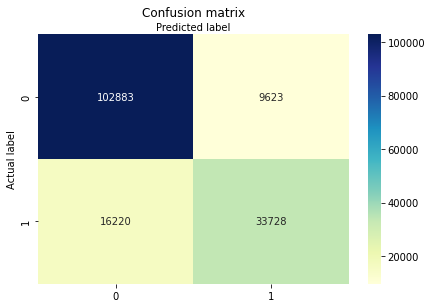

In [ ]:
# # visualisation: 
# # name of classes 
# class_names=[0,1] 
# fig, ax = plt.subplots() 
# tick_marks = np.arange(len(class_names)) 
# plt.xticks(tick_marks, class_names) 
# plt.yticks(tick_marks, class_names) 
# # create heatmap 
# sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
# ax.xaxis.set_label_position("top") 
# plt.tight_layout() 
# plt.title('Confusion matrix', y=1.1) 
# plt.xlabel('Actual label')
# plt.ylabel('Predicted label')  
# plt.savefig('BNB_Model_CM.png', dpi=1080, format='png')

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89    112506
           1       0.78      0.68      0.72     49948

    accuracy                           0.84    162454
   macro avg       0.82      0.79      0.81    162454
weighted avg       0.84      0.84      0.84    162454



### Tweaking the model

Trying different n_gram =(2,2)

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range = (2,2))
text_counts = cv.fit_transform(data['Cleaned_tweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['new_sentiment'],test_size=0.30, random_state=5)

#Defining the model-> we will use BernoulliNB
#Compiling the model -> We will import precompiled BNB from sklearn library
#Fitting the model
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)


BernoulliNB()

Evaluating the model

In [ ]:
predicted = BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test,predicted)
precision_score = metrics.precision_score(Y_test,predicted)
recall_score = metrics.recall_score(Y_test,predicted)

print("Accuracy:",str('{:04.2f}'.format(accuracy_score*100))+'%')
print("Precision:",str('{:04.2f}'.format(precision_score*100))+'%')
print("Recall:",str('{:04.2f}'.format(recall_score*100))+'%')

Accuracy: 84.83%
Precision: 76.71%
Recall: 72.74%


In [ ]:
cm = metrics.confusion_matrix(Y_test,predicted)
cm

array([[101477,  11029],
       [ 13615,  36333]])

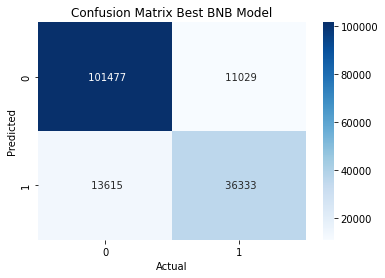

In [ ]:
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix Best BNB Model')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.savefig('BNB_Model2.png', dpi=1080, format='png')

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    112506
           1       0.77      0.73      0.75     49948

    accuracy                           0.85    162454
   macro avg       0.82      0.81      0.82    162454
weighted avg       0.85      0.85      0.85    162454



Trying different n_gram=(3,3)

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range = (3,3))
text_counts = cv.fit_transform(data['Cleaned_tweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['new_sentiment'],test_size=0.30, random_state=5)

#Fitting the model
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)

Accuracy: 81.68%
Precision: 70.49%
Recall: 69.52%


Evaluating the Model

In [ ]:
predicted = BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test,predicted)
precision_score = metrics.precision_score(Y_test,predicted)
recall_score = metrics.recall_score(Y_test,predicted)

print("Accuracy:",str('{:04.2f}'.format(accuracy_score*100))+'%')
print("Precision:",str('{:04.2f}'.format(precision_score*100))+'%')
print("Recall:",str('{:04.2f}'.format(recall_score*100))+'%')


### Trying different Naive Bayes algorithms

In [ ]:
#CNB
CNB = ComplementNB()
CNB.fit(X_train, Y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(X_test),Y_test)

#MNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test),Y_test)

print('CNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')
print('MNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')


CNB accuracy = 77.83%
MNB accuracy = 78.68%


### Improving the Accuracy using TF-IDF

In [ ]:
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(data['Cleaned_tweets'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, data['new_sentiment'],test_size=0.30,random_state=5)

#BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('BNB accuracy = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

#CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('CNB accuracy = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

#MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('MNB accuracy = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')



BNB accuracy = 84.44%
CNB accuracy = 84.46%
MNB accuracy = 82.46%
